<div style="line-height:0.45">
<h1 style="color:#0AE42F "> Hierarchical clustering </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> filterwarnings + silhouette_score + davies_bouldin_score+ calinski_harabasz_score + scipy clusters
</span>
</div>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
dataset_mall = pd.read_csv('./data_to_use/mall_customers_example.csv')
dataset_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select Features for Clustering => no y labels here!
X = dataset_mall.iloc[:, [3,4]].values  

In [5]:
"""  Set the visual style of the predefined plots to "fivethirtyeight" for all plots. """
plt.style.use('fivethirtyeight')

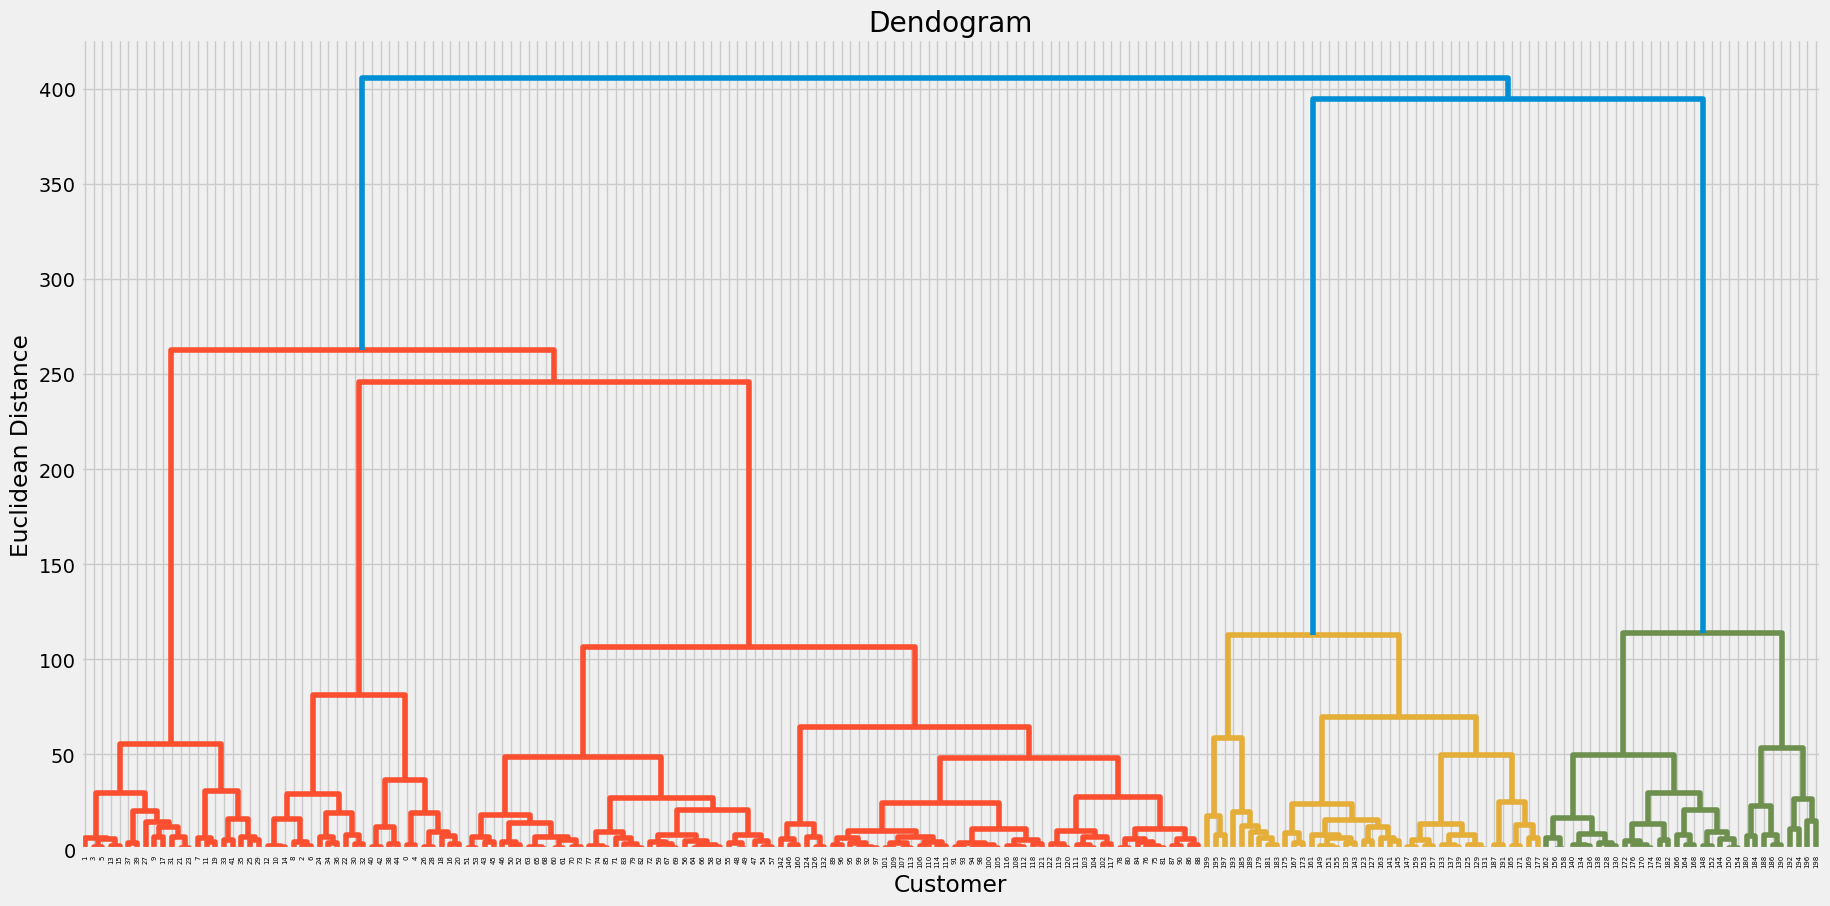

In [6]:
##### Visualize the structure of the data and assists in choosing the number of clusters.
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram( sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

<h3 style="color:#0AE42F "> AgglomerativeClustering <br> 
Recursively merges pair of clusters of sample data using a linkage distance </h3>

The affinity [str or callable, default='euclidean'] is the metric to use when calculating distance between instances. <br>
The linkage method determines how the distances between clusters are computed during the merging process. 

+ Ward Linkage => To minimize the variance within the clusters being merged, making it a variance-minimizing linkage criterion, to create compact and balanced clusters.

+ Single Linkage ("min"):
The distance between two clusters is defined as the minimum distance between any member of one cluster and any member of the other cluster.

+ Complete Linkage ("max"):
The distance between two clusters is defined as the maximum distance between any member of one cluster and any member of the other cluster.

+ Average Linkage:
The distance between two clusters is defined as the average distance between all pairs of members from the two clusters.

+ Centroid Linkage:
The distance between two clusters is defined as the distance between their centroids (mean vectors).

+ Median Linkage: 
Similar to centroid linkage, but uses the medians of the clusters.

In [5]:
""" Perform Agglomerative Clustering """
hc = AgglomerativeClustering( n_clusters= 5 , affinity= 'euclidean', linkage= 'ward')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [6]:
y_hc = hc.fit_predict(X)

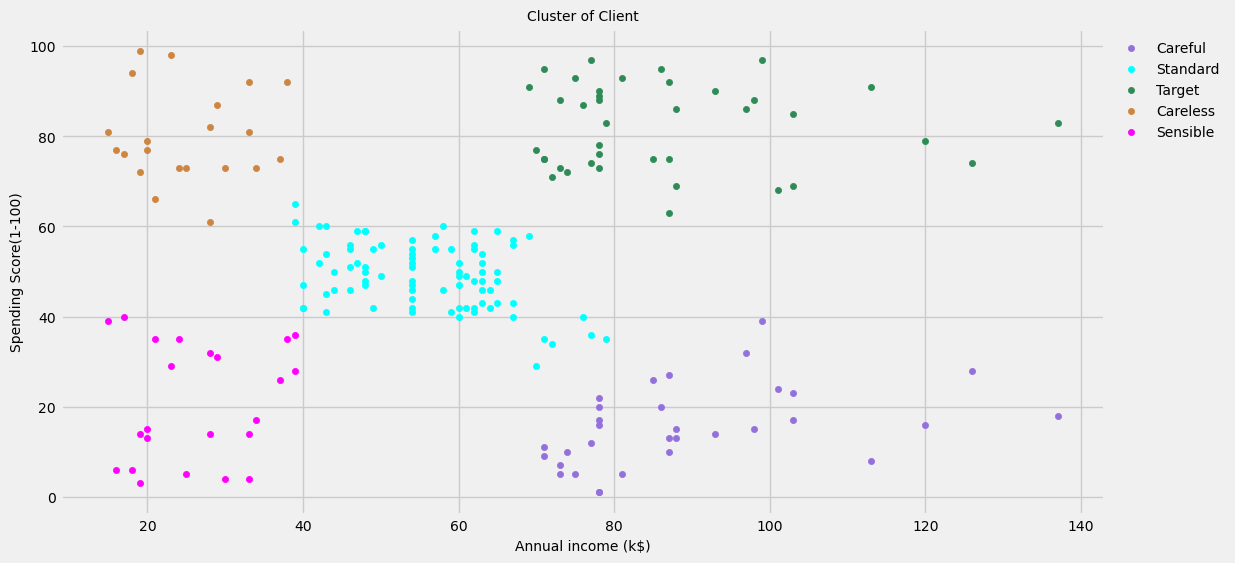

In [25]:
######### Visualize clusters
plt.figure(figsize=(12, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=20, c='mediumpurple', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=20, c='cyan', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=20, c='seagreen', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=20, c='peru', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=20, c='magenta', label = 'Sensible')
plt.title('Cluster of Client', fontsize = 10)
plt.xlabel('Annual income (k$)', fontsize = 10)
plt.ylabel('Spending Score(1-100)', fontsize = 10)
## Customize the fontsize of the numbers on the axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.show()

<h3 style="color:#0AE42F "> Metrics </h3>

In [23]:
# Evaluate clustering using silhouette, Davies-Bouldin, and Calinski-Harabasz scores
silhouette_avg = silhouette_score(X, y_hc)
db_score = davies_bouldin_score(X, y_hc)
ch_score = calinski_harabasz_score(X, y_hc)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Score:", db_score)
print("Calinski-Harabasz Score:", ch_score)

Silhouette Score: 0.5529945955148897
Davies-Bouldin Score: 0.5782207452369454
Calinski-Harabasz Score: 243.07142892964563


<h3 style="color:#0AE42F "> => Standarize the scaler and find new clusters </h3>

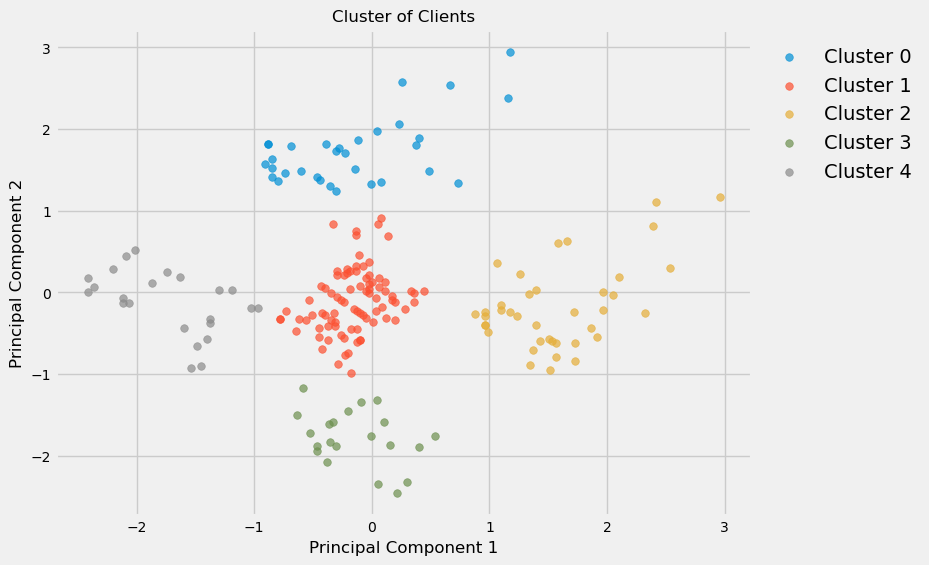

In [26]:
# Analyze cluster characteristics
X_standardized = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

plt.figure(figsize=(8, 6))

# Scatter plots for each cluster
for cluster_label in range(5):
    plt.scatter(X_pca[y_hc == cluster_label, 0], X_pca[y_hc == cluster_label, 1], s=30, label=f'Cluster {cluster_label}', alpha=0.7)

# Title and labels
plt.title('Cluster of Clients', fontsize=12)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Legend outside the figure (top right corner)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Show the figure
plt.show()